In [1]:
from src import data_utils
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
app_train_copy, app_test_copy = data_utils.get_datasets()

Files in the bucket:
credit-data-2010/LeaderBoard_Data.zip
c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\dataset\LeaderBoard_Data.zip
Downloaded credit-data-2010/LeaderBoard_Data.zip to c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\dataset\LeaderBoard_Data.zip
credit-data-2010/Leaderboard_Submission_Example.zip
c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\dataset\Leaderboard_Submission_Example.zip
Downloaded credit-data-2010/Leaderboard_Submission_Example.zip to c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\dataset\Leaderboard_Submission_Example.zip
credit-data-2010/PAKDD-2010 training data.zip
c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\dataset\PAKDD-2010 training data.zip
Downloaded credit-data-2010/PAKDD-2010 

c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\src\data_utils.py:42: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(f'{config.DATASET_ROOT_PATH}/PAKDD2010_Modeling_Data.txt', delimiter='\t', encoding='iso-8859-1', header=None)


In [3]:
import importlib
importlib.reload(data_utils)
app_train = app_train_copy.copy()
app_target = app_test_copy.copy()

app_train = data_utils.rename_columns_duplicated(app_train)
app_target = data_utils.rename_columns_duplicated(app_target)

unnecesary_columns = [
    'ID_CLIENT', # ID 
    'CLERK_TYPE', # Fue eliminado porque todos los valores son los mismos
    'QUANT_SPECIAL_BANKING_ACCOUNTS',# La columna está repetida
    'POSTAL_ADDRESS_TYPE',
    'PROFESSIONAL_BOROUGH', # La columna está repetida
    'PROFESSIONAL_ZIP_3', # La columna está repetida 
    'NACIONALITY', # 97% tenia el valor de 1 que es Brazil (inferencia)
    'PROFESSIONAL_CITY', # 67% está nulo
    'RESIDENCIAL_PHONE_AREA_CODE',
    'FLAG_MOBILE_PHONE',
    'PROFESSIONAL_PHONE_AREA_CODE',
    'FLAG_ACSP_RECORD',
    'RESIDENCIAL_ZIP_3',
    'FLAG_EMAIL',
    ]
app_train = data_utils.clean_unnecesary_columns(app_train, unnecesary_columns)
app_target = data_utils.clean_unnecesary_columns(app_target, unnecesary_columns)

app_train = data_utils.delete_constant_columns(app_train)
app_target = data_utils.delete_constant_columns(app_target)

duplicated ['QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF']
duplicated []


In [4]:

app_train = data_utils.sex_normalization(app_train)
app_target = data_utils.sex_normalization(app_target)

BINARY_COLUMNS = ['FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE']
app_train = data_utils.preprocess_binary_columns(app_train, BINARY_COLUMNS)
app_target = data_utils.preprocess_binary_columns(app_target, BINARY_COLUMNS)


COMPLETE_WITH_MODE = ['MONTHS_IN_RESIDENCE']
app_train = data_utils.complete_with_mode(app_train, COMPLETE_WITH_MODE)
app_target = data_utils.complete_with_mode(app_target, COMPLETE_WITH_MODE)

FREQ_ENC = [ 'CITY_OF_BIRTH','RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH','MONTHS_IN_RESIDENCE']

app_train = data_utils.frequency_encoding(app_train, FREQ_ENC)
app_target = data_utils.frequency_encoding(app_target, FREQ_ENC)

COLUMNS_MISSING_VALUES = ['PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'META_EDUCATION_LEVEL','RESIDENCE_TYPE']
app_train = data_utils.fill_missing_with_unknown(app_train, COLUMNS_MISSING_VALUES)
app_target = data_utils.fill_missing_with_unknown(app_target, COLUMNS_MISSING_VALUES)


COLUMNS_TO_ENCODE = ['STATE_OF_BIRTH', 'RESIDENCIAL_STATE', 'PROFESSIONAL_STATE','PROFESSION_CODE'] + COLUMNS_MISSING_VALUES
app_train = data_utils.label_encode_columns(app_train, COLUMNS_TO_ENCODE)
app_target = data_utils.label_encode_columns(app_target, COLUMNS_TO_ENCODE)


OHE = ['APPLICATION_SUBMISSION_TYPE','SEX']

app_train = data_utils.one_hot_encoder_application(app_train, OHE)
app_target = data_utils.one_hot_encoder_application(app_target, OHE)

FIX_OUT = ['PERSONAL_MONTHLY_INCOME','OTHER_INCOMES','PERSONAL_ASSETS_VALUE']

app_train = data_utils.fix_outliers(app_train, FIX_OUT)
app_target = data_utils.fix_outliers(app_target, FIX_OUT)


NORMALIZATION = ['PERSONAL_MONTHLY_INCOME','OTHER_INCOMES','PERSONAL_ASSETS_VALUE']
app_train = data_utils.normalization(app_train,NORMALIZATION)
app_target = data_utils.normalization(app_target,NORMALIZATION)

app_train_x , app_test_x, app_train_y, app_test_y  = train_test_split(app_train.drop('TARGET_LABEL_BAD=1', axis=1), app_train['TARGET_LABEL_BAD=1'], test_size=0.2, random_state=42)

c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\src\data_utils.py:297: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app[col].fillna(mode_value, inplace=True)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


lr =  LogisticRegression()
lr.fit(app_train_x, app_train_y)

# Realizar predicciones en el conjunto de prueba
y_pred = lr.predict(app_test_x)

# Calcular la precisión del clasificador SVM
accuracy = accuracy_score(app_test_y, y_pred)
print("Precisión del clasificador SVM:", accuracy)


Precisión del clasificador SVM: 0.7331


c:\Users\sarqu\OneDrive\Documents\MEGAsync Downloads\Win7-GSS\AnyoneAI\2023\final\creditriskanalysis\cra_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


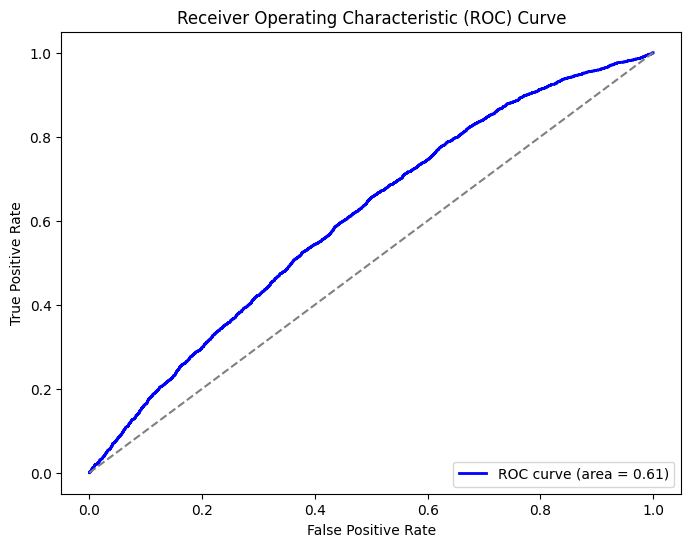

In [6]:
y_probabilities = lr.predict_proba(app_test_x)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(app_test_y, y_probabilities)
auc = roc_auc_score(app_test_y, y_probabilities)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
import joblib
joblib.dump(lr, 'modelo_log_reg.pkl')

['modelo_log_reg.pkl']

In [14]:
loaded_model = joblib.load('modelo_log_reg.pkl')

In [15]:
loaded_model.predict(app_test_x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)